In [1]:
from pymongo import MongoClient
import os
client = MongoClient(os.environ.get("SELECTED_TESTS_MONGO_URI"))

db = client.selected_tests
pipeline = [{"$lookup": {"from": "test_mappings_test_files", "localField": "_id",  "foreignField": "test_mapping_id", "as": "test_files" }}, {"$unwind": "$test_files"}, {"$addFields": {"threshold": {"$divide": ["$test_files.test_file_seen_count", "$source_file_seen_count"]}}}]

test_mappings = db.test_mappings.aggregate(pipeline)
thresholds = []
for mapping in test_mappings:
    thresholds.append(mapping["threshold"])

print(len(thresholds))

2867876


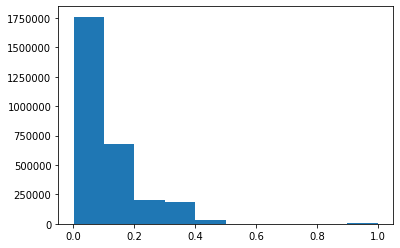

In [2]:
from matplotlib import pyplot
pyplot.hist(thresholds)
pyplot.show()